In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
E_artykuł = np.array([-1.8499, -0.8886, -0.5168, -0.3304, -0.2304, -0.1683, -0.1290, -0.1013, -0.0820, -0.0660, -0.0559])
E_SM = np.load("energie własne E dla Coulomba 1D SM.npy")
E_FD = np.load("energie własne E dla Coulomba 1D FD.npy")
energy_levels = range(len(E_SM))

In [11]:
E_FD

array([-1.84995533, -0.88857791, -0.51681961, -0.3303957 , -0.23032223,
       -0.16825729, -0.1288956 , -0.10134799, -0.08210598, -0.0675905 ,
       -0.05674989, -0.04776583, -0.0395548 , -0.03045411, -0.02022471,
       -0.00836101])

In [24]:
roźnica_SM = np.ones(len(E_artykuł))
roźnica_FD = np.ones(len(E_artykuł))
for i in range(len(E_artykuł)):
    roźnica_SM[i] = np.abs(E_artykuł[i] - E_SM[i])
    roźnica_FD[i] = np.abs(E_artykuł[i] - E_FD[i])

energy_levels = range(len(E_artykuł)) # wektor poziomów energetycznych od 0 do len(roźnica)

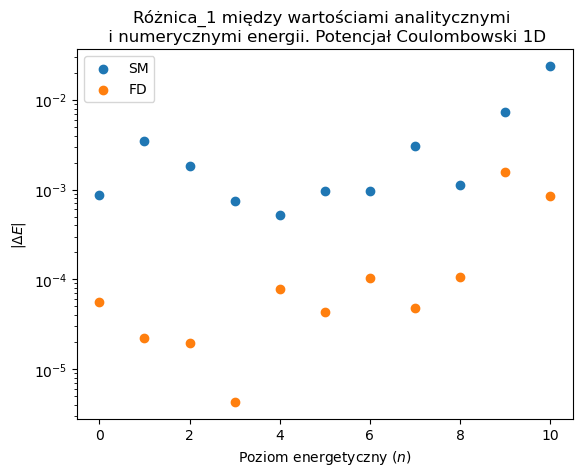

In [25]:
plt.scatter(energy_levels, roźnica_SM, label='SM')
plt.scatter(energy_levels, roźnica_FD, label='FD')
plt.xlabel('Poziom energetyczny ($n$)')
plt.ylabel('$|\Delta E|$')
plt.title('Różnica_1 między wartościami analitycznymi \n i numerycznymi energii. Potencjał Coulombowski 1D')
plt.yscale('log')
plt.xticks(np.arange(min(energy_levels), max(energy_levels) + 1, 2))  
plt.legend()
plt.savefig("Różnica energii. Coulomb 1.pdf", bbox_inches='tight')  # dpi=300 - wysoka jakość
plt.show()

In [3]:
#psi_E_An = np.load("funkcje psi(E) dla Coulomba 1D Anal.npy")
#psi_E_An /= np.linalg.norm(psi_E_An)

psi_E_SM = np.load("funkcje psi(E) dla Coulomba 1D SM.npy")
for i in range(len(psi_E_SM)):
    psi_E_SM[i] /= np.linalg.norm(psi_E_SM[i])

psi_E_FD = np.load("funkcje psi(E) dla Coulomba 1D FD.npy")
for i in range(len(psi_E_FD[0])):
    psi_E_FD[:, i] /= np.linalg.norm(psi_E_FD[:, i])

In [4]:
#x_An = np.linspace(-12.5, 12.5, 1000)

N_SM = 2**9            # liczba punktów siatki - 1 w każdym kierunku
L_SM= 100           # długość boku obszaru
x_SM = np.linspace(-L_SM/2, L_SM/2, N_SM)

N_FD = 2**13
x_max = 50
x_FD = np.linspace(-x_max, x_max, N_FD)

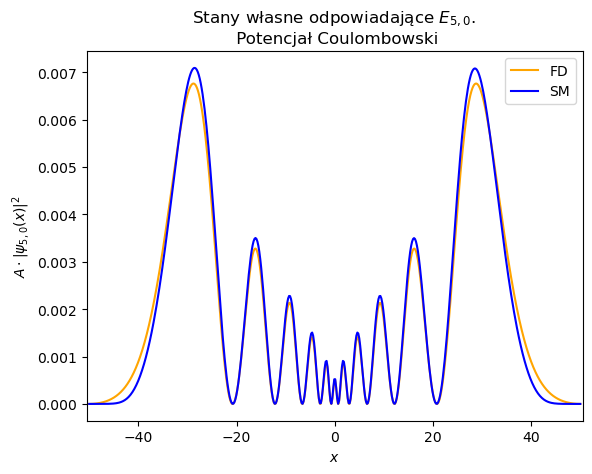

In [66]:

plt.plot(x_FD, 16.0*np.abs(psi_E_FD[:, 10])**2, color='orange', label='FD')
#plt.plot(x_An, 1*np.abs(psi_E_An)**2, color='green', label='Analityczny')
plt.plot(x_SM, 1.0*np.abs(psi_E_SM[10])**2, color='blue', label='SM')
plt.xlim(-50.5, 50.5)
#plt.ylim(0, 0.002)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$A\cdot|\psi_{5,0}(x)|^2$')
plt.title('Stany własne odpowiadające $E_{5,0}$. \n Potencjał Coulombowski')
plt.savefig("Stany własne dla E_5,0. Coulomb.pdf", bbox_inches='tight')
plt.show()

In [62]:

from scipy.fft import fft, ifft, fftfreq

In [7]:

dt = 0.018         # krok czasowy
Nt = 2**15
T_max = Nt * dt       # maksymalny czas
t_values = np.arange(Nt) * dt

window = (1 - np.cos(2 * np.pi * t_values / T_max)) / T_max

In [9]:
# Stosujemy okno czasowe Hann jak wcześniej
psi_t_windowed = psi_t * window[:, np.newaxis]


In [24]:
np.save("funkcje psi(t)_windowed dla studni gładkiej skończonej 1D.npy", psi_t_windowed)

NameError: name 'psi_t_windowed' is not defined

In [3]:
psi_t_windowed = np.load("funkcje psi(t)_windowed dla studni kwadratowej skończonej 1D.npy")

In [6]:

psi_E = fft(psi_t_windowed, axis=0)  # shape: (Nt, Nx)


In [29]:
np.save("funkcje psi(t)_E dla studni kwadratowej skończonej 1D.npy", psi_E)

In [17]:
results = ([0.714035, 2.726324, 4.992207])

In [18]:
for r in results:
    print(r)

0.714035
2.726324
4.992207


In [21]:
eigen_psi = []

for r in results:
    # Znajduję najbliższy indeks na osi energii
    idx = np.argmin(np.abs(E + r))
    psi_n = psi_E[idx, :]  # Funkcja falowa dla En (do normowania)
    eigen_psi.append(psi_n)


In [23]:
eigen_psi_norm = [ψn / np.linalg.norm(ψn) for ψn in eigen_psi]

In [27]:

N = 2**14            # liczba punktów siatki - 1 w każdym kierunku
L = 1800           # długość boku obszaru
x = np.linspace(-L/2, L/2, N)

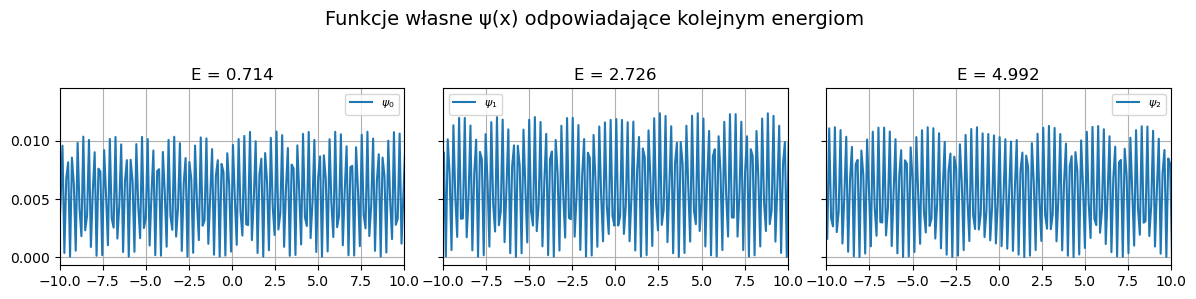

In [28]:
num_states = len(eigen_psi_norm)
cols = 3
rows = (num_states + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

for i, ψn in enumerate(eigen_psi_norm):
    ax = axes[i]
    ax.plot(x, 100*np.abs(ψn)**2, label=r"$\psi_{%d}$" % i)
    ax.set_title(f"E = {(results[i]):.3f}")
    ax.grid(True)
    ax.legend(fontsize=8)
    ax.set_xlim(-10, 10)
    #ax.set_ylim(-145, -95)

# Jeśli są puste komórki, wyłącz je
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Funkcje własne ψ(x) odpowiadające kolejnym energiom", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
